## Author: Makayla McKibben
### Course: DSC 540 Data Preparation
### Assignment: Week 5 & 6 Exercises
### Date: 10.02.2024

In [2]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib3
import sqlite3

In [3]:
from tabula import read_pdf

In [4]:
!pip install sqlalchemy

In [5]:
import sqlalchemy as sqla

## Activity 5.01

In [7]:
# Read the webpage to a dataframe
wiki_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
wiki_gdp = pd.read_html(wiki_url)

In [8]:
# Print how many tables and their general structure
print('There are ', len(wiki_gdp), 'tables, here is a preview of them.')
wiki_gdp

There are  7 tables, here is a preview of them.


[                                                   0
 0  Largest economies in the world by GDP (nominal...,
                                                    0  \
 0  > $20 trillion $10–20 trillion $5–10 trillion ...   
 
                                                    1  \
 0  $750 billion – $1 trillion $500–750 billion $2...   
 
                                                    2  
 0  $50–100 billion $25–50 billion $5–25 billion <...  ,
     Country/Territory IMF[1][13]            World Bank[14]             \
     Country/Territory   Forecast       Year       Estimate       Year   
 0               World  109529216       2024      105435540       2023   
 1       United States   28781083       2024       27360935       2023   
 2               China   18532633  [n 1]2024       17794782  [n 3]2023   
 3             Germany    4591100       2024        4456081       2023   
 4               Japan    4110452       2024        4212945       2023   
 ..                ...      

In [9]:
# Select the correct table
country_gdp = wiki_gdp[2]

In [10]:
# Get headers
gdp_header = country_gdp.columns.values.tolist()
gdp_header

[('Country/Territory', 'Country/Territory'),
 ('IMF[1][13]', 'Forecast'),
 ('IMF[1][13]', 'Year'),
 ('World Bank[14]', 'Estimate'),
 ('World Bank[14]', 'Year'),
 ('United Nations[15]', 'Estimate'),
 ('United Nations[15]', 'Year')]

In [11]:
# Change headers
gdp_header = country_gdp.set_axis(['Country/Territory', 'International Monetary Fund Forecast', 'International Monetary Fund Year', 'World Bank Estimate', 'World Bank Year', 'United Nations Estimate', 'United Nations Year'], axis = 1) 
gdp_header

,Country/Territory,International Monetary Fund Forecast,International Monetary Fund Year,World Bank Estimate,World Bank Year,United Nations Estimate,United Nations Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022
...,...,...,...,...,...,...,...
205,Kiribati,311,2024,279,2023,223,2022
206,Palau,308,2024,263,2023,225,2022
207,Marshall Islands,305,2024,284,2023,279,2022
208,Nauru,161,2024,154,2023,147,2022


In [12]:
# Create IMF df
IMF = gdp_header[['Country/Territory', 'International Monetary Fund Forecast', 'International Monetary Fund Year']].copy()
IMF

,Country/Territory,International Monetary Fund Forecast,International Monetary Fund Year
0,World,109529216,2024
1,United States,28781083,2024
2,China,18532633,[n 1]2024
3,Germany,4591100,2024
4,Japan,4110452,2024
...,...,...,...
205,Kiribati,311,2024
206,Palau,308,2024
207,Marshall Islands,305,2024
208,Nauru,161,2024


In [13]:
# Create world bank df
world_bank = gdp_header[['Country/Territory', 'World Bank Estimate', 'World Bank Year']].copy()
world_bank

,Country/Territory,World Bank Estimate,World Bank Year
0,World,105435540,2023
1,United States,27360935,2023
2,China,17794782,[n 3]2023
3,Germany,4456081,2023
4,Japan,4212945,2023
...,...,...,...
205,Kiribati,279,2023
206,Palau,263,2023
207,Marshall Islands,284,2023
208,Nauru,154,2023


In [14]:
# Create UN df
united_nations = gdp_header[['Country/Territory', 'United Nations Estimate', 'United Nations Year']].copy()
united_nations

,Country/Territory,United Nations Estimate,United Nations Year
0,World,100834796,2022
1,United States,25744100,2022
2,China,17963170,[n 1]2022
3,Germany,4076923,2022
4,Japan,4232173,2022
...,...,...,...
205,Kiribati,223,2022
206,Palau,225,2022
207,Marshall Islands,279,2022
208,Nauru,147,2022


## Activity 6.01

In [16]:
# Read csv into a df
visits = pd.read_csv('visit_data.csv')
visits

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
997,998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [17]:
# Look at the stats of the df visit column
visits.visit.describe()

count     974.000000
mean     1497.976386
std       838.959460
min         1.000000
25%       794.500000
50%      1477.000000
75%      2224.250000
max      2998.000000
Name: visit, dtype: float64

In [18]:
# Check for duplicates and print whether there are duplicates in a column 
print('There are duplicate emails in the dataset: ', len(visits['email'].unique()) < len(visits['email']))
print('There are duplicate ip addresses in the dataset: ', len(visits['ip_address'].unique()) < len(visits['ip_address']))
print('There are duplicate first names in the dataset: ', len(visits['first_name'].unique()) < len(visits['first_name']))
print('There are duplicate last names in the dataset: ', len(visits['last_name'].unique()) < len(visits['last_name']))

There are duplicate emails in the dataset:  False
There are duplicate ip addresses in the dataset:  False
There are duplicate first names in the dataset:  True
There are duplicate last names in the dataset:  True


In [19]:
# Check for not a number in all three critical columns and print if it's true there are missing values
print('The dataframe email column contains NaN: ', visits['email'].isnull().values.any())
print('The dataframe email column contains NaN: ', visits['email'].isnull().values.any())
print('The dataframe visits column contains NaN: ', visits['visit'].isnull().values.any())

The dataframe email column contains NaN:  False
The dataframe email column contains NaN:  False
The dataframe visits column contains NaN:  True


In [20]:
# Find how many are missing
print('There are {Nan} missing values in the visit column.'.format(Nan = visits['visit'].isnull().sum()))

There are 26 missing values in the visit column.


In [21]:
# Set a variable equal to the original length of the dataset
original_length = len(visits)

In [22]:
# Remove rows missing values in the visit column
visits = visits.dropna(subset = ['visit'])

In [23]:
# Verify our rows were dropped
visits['visit'].isnull().sum()

0

In [24]:
# Now set new length to variable for later use
new_length = len(visits)

In [25]:
# Report size difference
print('The length was {original} originally, it is now {new}, which is {dif} less rows.'.format(original = original_length, new = len(visits['email']), dif = (original_length - new_length)))

The length was 1000 originally, it is now 974, which is 26 less rows.


{'whiskers': [<matplotlib.lines.Line2D at 0x238a34b1730>,
 'caps': [<matplotlib.lines.Line2D at 0x238a34b1d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x238a34b1460>],
 'medians': [<matplotlib.lines.Line2D at 0x238a34b2360>],
 'fliers': [<matplotlib.lines.Line2D at 0x238a34b2660>],
 'means': []}

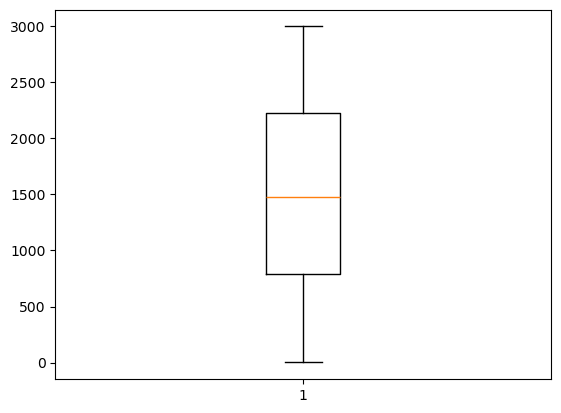

In [26]:
# Make a boxplot to look for outliers
plt.boxplot(visits['visit'])

In [27]:
# Using 2 std. deviations to remove outliers
trimmed_visits = visits[(visits['visit'] >= (1497 - 2 * 840)) & (visits['visit'] <= (1497 + 2 * 840))]

In [28]:
# Print new length
print('The length was {original} originally, it is now {trimmed}, which is {dif2} less rows.'.format(original = original_length, trimmed = len(trimmed_visits), dif2 = (original_length - len(trimmed_visits))))

The length was 1000 originally, it is now 974, which is 26 less rows.


I used the rule of two standard deviations above and below the mean in order to justify removing outliers. There were no outliers past those limits and so the df remained the same length as after our last removal for NaN entries.

## Weeks 5 & 6 Problem 3 Introduction to SQL

In [31]:
# Connect to database
con = sqlite3.connect('mckibbentest.db')

In [32]:
# Create table named BEST_BUSINESS_INFORMATION with the specified fields (note all fields are text)
con.execute(''' CREATE TABLE BEST_RESTAURANT_INFORMATION (NAME TEXT PRIMARY KEY NOT NULL, ADDRESS TEXT NOT NULL, CITY TEXT NOT NULL, STATE TEXT NOT NULL, ZIP TEXT NOT NULL, PHONE NUMBER TEXT NOT NULL);''')

In [33]:
# Point at the right place
cursor = con.cursor()
# Put data into the table we created
cursor.execute("INSERT INTO BEST_RESTAURANT_INFORMATION VALUES ('GUIDOS PIZZA', '235 N 5th ST.', 'BOISE', 'ID', '83702', '(208) 345-9011')");
cursor.execute("INSERT INTO BEST_RESTAURANT_INFORMATION VALUES ('FANCY FREEZE', '1402 W STATE ST.', 'BOISE', 'ID', '83702', '(208) 429-1400')");
cursor.execute("INSERT INTO BEST_RESTAURANT_INFORMATION VALUES ('BRICK 29 BISTRO', '320 11TH AVE. S Suite#300', 'NAMPA', 'ID', '83651', '(208) 468-0029')");
cursor.execute("INSERT INTO BEST_RESTAURANT_INFORMATION VALUES ('EGG FACTORY', '4685 PORTLAND RD. NE', 'SALEM', 'OR', '97305', '(503) 393-9124')");
cursor.execute("INSERT INTO BEST_RESTAURANT_INFORMATION VALUES ('KONDITOREI', '310 KEARNEY ST. SE', 'SALEM', 'OR', '97302', '(503) 585-7070')");
cursor.execute("INSERT INTO BEST_RESTAURANT_INFORMATION VALUES ('HI-WAY HOUSE', '2434 E 2ND ST.', 'THE DALLES', 'OR', '97058', '(541) 769-1410')");
cursor.execute("INSERT INTO BEST_RESTAURANT_INFORMATION VALUES ('BLAZEN BURGER', '216 1st AVE. S.', 'NAMPA', 'ID', '83651', '(208) 463-1985')"); 
cursor.execute("INSERT INTO BEST_RESTAURANT_INFORMATION VALUES ('JALAPENOS BAR AND GRILL', '1921 CALDWELL BLVD.', 'NAMPA', 'ID', '83651', '(208) 442-6355')");
cursor.execute("INSERT INTO BEST_RESTAURANT_INFORMATION VALUES ('LOS BETOS', '177 CALDWELL BLVD.', 'NAMPA', 'ID', '83651', '(208) 442-2939')");
cursor.execute("INSERT INTO BEST_RESTAURANT_INFORMATION VALUES ('DUTCH BROS', '1005 SUMMIT AVE.', 'MEDFORD', 'OR', '97501', '(877) 899-2767')");
cursor.execute("INSERT INTO BEST_RESTAURANT_INFORMATION VALUES ('EL PARAISO', '142 N FRONT ST.', 'MEDFORD', 'OR', '97501', '(541) 779-9770')");

In [34]:
# Commit transaction
con.commit()

In [35]:
# Read from the sql table we created
pd.read_sql('SELECT * FROM BEST_RESTAURANT_INFORMATION', con)

,NAME,ADDRESS,CITY,STATE,ZIP,PHONE
0,GUIDOS PIZZA,235 N 5th ST.,BOISE,ID,83702,(208) 345-9011
1,FANCY FREEZE,1402 W STATE ST.,BOISE,ID,83702,(208) 429-1400
2,BRICK 29 BISTRO,320 11TH AVE. S Suite#300,NAMPA,ID,83651,(208) 468-0029
3,EGG FACTORY,4685 PORTLAND RD. NE,SALEM,OR,97305,(503) 393-9124
4,KONDITOREI,310 KEARNEY ST. SE,SALEM,OR,97302,(503) 585-7070
5,HI-WAY HOUSE,2434 E 2ND ST.,THE DALLES,OR,97058,(541) 769-1410
6,BLAZEN BURGER,216 1st AVE. S.,NAMPA,ID,83651,(208) 463-1985
7,JALAPENOS BAR AND GRILL,1921 CALDWELL BLVD.,NAMPA,ID,83651,(208) 442-6355
8,LOS BETOS,177 CALDWELL BLVD.,NAMPA,ID,83651,(208) 442-2939
9,DUTCH BROS,1005 SUMMIT AVE.,MEDFORD,OR,97501,(877) 899-2767
